https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda

# 複習
* 在前面的章節我們說明了如何使用Perceptron, Logistic Regression, SVM在平面中用一條線將資料分為兩類
* 並且Logistic Regression以及 SVM都可以知道這筆資料是A類還是B類的機率
* 更強大的SVM還可以透過將平面資料投影到空間中來做到非線性分類。

# 決策樹(Decision Tree)
* 決策樹就是一個解釋性能力很強的模型。
* 在訓練過程中決策樹會問出一系列的問題像是溫度是否>125 ，濕度是否<5%之類的是非問題。
* 分割的原則是：這樣的分割要能得到最大的資訊增益(Information gain, 簡稱IG)。

決策樹的模型長相：

![Image of Yaktocat](https://miro.medium.com/max/549/1*GXefHTYamFu1I-ngFUXb3Q.png)

In [ ]:
接下來介紹一下如何使用決策樹來的分類Iris資料集！

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [ ]:
老樣子！先在載入必要函式以及Iris資料集

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


sepal length (cm)  petal length (cm)  target
0                5.1                1.4       0
1                4.9                1.4       0
2                4.7                1.3       0

In [ ]:
將資料的70%拿出來train，剩下的30％用來檢測train的好壞

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [6]:
# 不需要做特徵標準化

In [7]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

載入決策樹函式，criterion使用我們前面介紹的entropy，也可以使用gini impurity，max_depth在實務上很常用到，主要是可以防止樹長得過高造成overfit，由於這個範例很簡單不設max_depth也可以正確分類

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

In [10]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [ ]:
寫個迴圈看一下預測結果，發現也全部預測正確了！另外也可以用score函數來計算正確率

In [11]:
tree.predict(X_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1])

In [12]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1])

In [13]:
error = 0
for i, v in enumerate(tree.predict(X_test)):
    if v!= y_test['target'].values[i]:
        print(i,v)
        error+=1
print(error)

0


In [14]:
tree.score(X_test,y_test['target'])

1.0

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [ ]:
視覺化決策樹的決策邊界

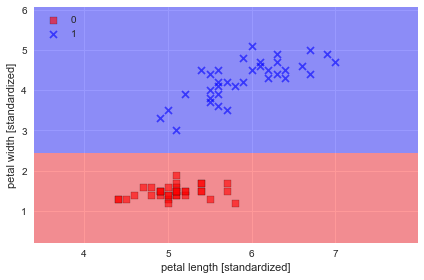

In [16]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
另外我們可以使用export_graphviz函式來將樹的實際長相視覺化

In [17]:
from sklearn.tree import export_graphviz

In [18]:
#要視覺化決策樹必須先安裝Graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['sepal length (cm)','petal length (cm)'])

In [ ]:
由於兩個類別對於決策樹來說太簡單，看不出決策樹的威力，我們來試一下三個類別的情況，下圖馬上就能看出決策樹的威力。

In [19]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['petal width (cm)','petal length (cm)','target']]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


petal width (cm)  petal length (cm)  target
0               0.2                1.4       0
1               0.2                1.4       0
2               0.2                1.3       0

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['petal width (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

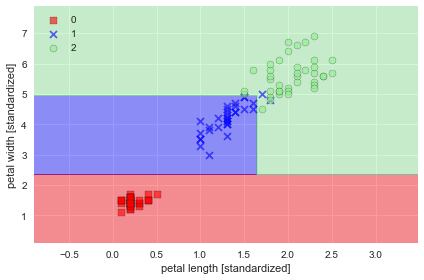

In [22]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
#要視覺化決策樹必須先安裝Graphviz
export_graphviz(tree, out_file='tree2.dot', feature_names=['sepal length (cm)','petal length (cm)'])

# 隨機森林(Random Forest)
* 在近幾年隨機森林非常受到青睞，被運用在大量的機器學習應用中，它的效能、預測能力都很強，而且非常容易使用
* 另外隨機森林還能更去觀察每一個特徵的重要度。
* 你可以把隨機森林當作是多個決策樹組合而成的，這個在機器學習領域稱為Ensemble中文可以叫整體或集成。
* 整體機器學習(Ensemble learning)演算法則是結合多個弱學習器來建構一個強穩的模型，而這種模型比較不會有偏差或是發生高度適合(Overfit)。
* 簡單來說機器學習演算法有兩種，一種是天才領導型的、一種是眾人投票型的，而隨機森林就是屬於眾人投票型的。
* 你所需要關心的參數主要只有n_estimators樹木的多寡(你要創造幾個決策樹來投票)，通常越多越好，但運算時間也會拉長。
* n_jobs主要是隨機森林支援平行運算，你可以決定要用你電腦的幾個核心去算，來加速運算速度。其他參數新手可以先忽略

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=3,n_jobs=2)

In [26]:
forest.fit(X_train,y_train['target'].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=3,
            verbose=0, warm_start=False)

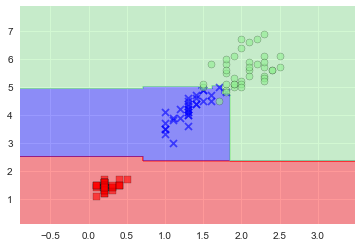

In [27]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=forest)